<p>Aby policzyć promień obserwowalnego wszechswiata musimy wziac pod uwage iż cały czas się on rozszerza. Według dzisiejszej wiedzy wszechświat ma 13.7 miliarda lat. Na pierwszy rzut oka można by założyć że najstarszy foton jaki możemy zobaczyc przebył maksymalnie 13.7 miliarda lat świetlnych, lecz tak naprawdę możemy obserwować obiekty oddalone o wiele bardziej ze względu na to że przestrzeń pomiedzy tymi obiektami cały czas się rozszerza. Aby policzyć poprawny horyzont cząstek musimy <strong>skorzystać ze wzoru na odległość kt&oacute;ry bierze pod uwage rozszerzanie się wszechświata</strong>:</p>

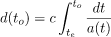

<p><br />
Gdzie:<br />
d(t0) - obecny dystans od obiektu<br />
c - predkość światła w pr&oacute;żni<br />
te - moment w kt&oacute;rym światło zostało wyemitowane z obiektu<br />
t0 - moment w kt&oacute;rym światło dotarło do obserwatora<br />
a(t) - funkcja wsp&oacute;łczynnika skali od czasu</p>

<p>Aby policzyć wsp&oacute;łczynnik skali musimy przekształcić <strong>pierwsze r&oacute;wnanie Friedmanna:</strong></p>

<p>&nbsp;</p>

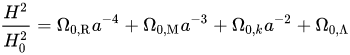

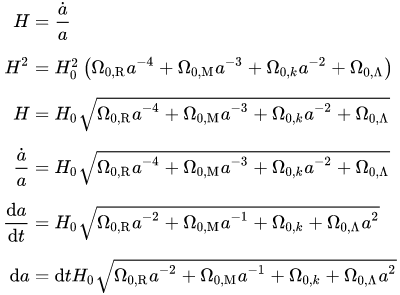

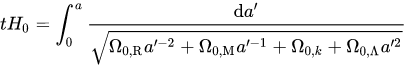

Ω0,R reprezentuje dzisiejsza gęstość promieniowania (gdy a = 1), Ω0,M jest obecną gęstością masy (ciemnej + barionowej), Ω0,k = 1 − Ω0 jest obecna gestoscia krzywizny przestrzeni, Ω0,Λ reprezentuje stałą kosmiczną. H jest to parametr hubbla za to H0 jest to stała hubbla.<br>
Na podstawie misji Plancka z 2018 roku wiemy że:<br>

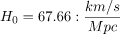











A więc: <br>





Po zsumowaniu wszstkich gęstości otrzymamy gęstość całkowitą Ω0 = 1. Co oznacza iż nasz wszechświat jest płaski i możemy pominąć Ω0,k = 1 − Ω0 gdyż wynosi ona 0






In [1]:
import numpy as np
import scipy.integrate as integrate
import math
%matplotlib inline
import matplotlib.pyplot as plt

# Stała hubbla w jednostkach SI
H0 = 67.66 * 0.00102271
 
# Parametry gęstości
pR = 0.0014936944554559174
pM = 0.30966
pL = 0.6888463055445441

Importujemy potrzebne biblioteki oraz definiujemy stałe

In [2]:
a = np.linspace(1e-100, 1, 100000)

Tworzymy oś liczbową dla współczynnika skali od 0 do 1. (Początkiem osi liczbowej nie może być zero aby uniknąć problemu dzielenia przez 0)

In [3]:
def expression(a):
    return 1 / math.sqrt((pR/a**2)+(pM/a) + (a**2 * pL))

Definiujemy wyrażenie w środku całki w przekształconym wzorze Friedmanna

In [4]:
t = np.array([integrate.quad(expression, 0, i)[0]/H0 for i in a])

Liczymy t dla każdego punktu na osi liczbowej a. Za każdym razem dzielimy przez H0 aby zostało nam samo t.<br>
Następnie grafujemy współczynnik skali od czasu.

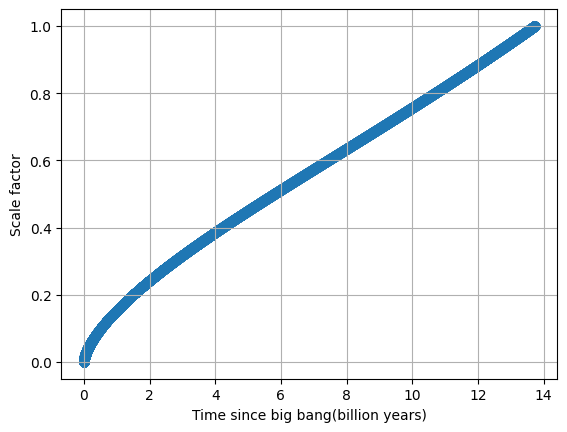

In [5]:
plt.scatter(t, a)

plt.xlabel('Time since big bang(billion years)')
plt.ylabel('Scale factor')
plt.title('')
plt.grid()

plt.show()

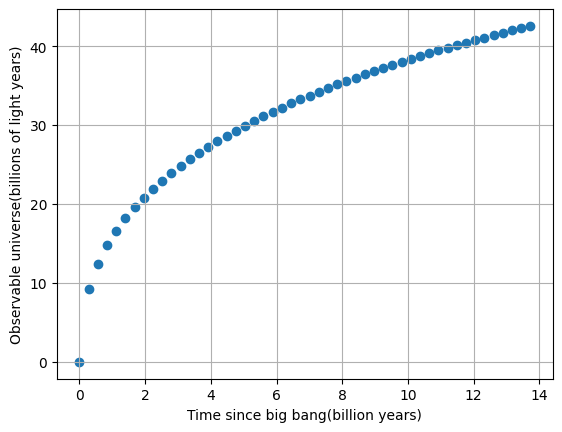

In [6]:
plt.clf()
# Wiek wszechświata bedzie ostatnim elementem z tablicy t
universe_age = t[-1]
 
# Szukamy wielomianu który jak najlepiej opisuje ten wykres
coefs = np.polyfit(t, a, 13)
a = np.poly1d(coefs)

#Implementujemy wyrażenie z środka całki wzoru na odległość
expr2 = lambda t: 1/a(t)

#Definiujemy os czasu dla wykresu horyzontu cząsteczek od czasu
t_2 = np.linspace(1e-10, universe_age)

#Dla kazdego punktu na osi czasu liczymy promien horyzontu czasteczek 
d = np.array([integrate.quad(expr2,0,i)[0] for i in t_2])

#Generujemy wykres widzialnego wszechswiata(horyzontu czasteczek) od czasu
plt.scatter(t_2, d)
plt.xlabel('Time since big bang(billion years)')
plt.ylabel('Observable universe(billions of light years)')
plt.title('')
plt.grid()
plt.show()

In [7]:
#Liczymy horyzont czasteczek dla dziejszego czasu
d_now = integrate.quad(expr2,0,universe_age)[0]
print(f"Wiek wszechswiata: {universe_age} miliarda lat świetlnych")
print(f"Promien horyzontu cząsteczek {d_now} miliarda lat świetlnych")

Wiek wszechswiata: 13.725909665565062 miliarda lat świetlnych
Promien horyzontu cząsteczek 42.56182655244563 miliarda lat świetlnych


Obecnie założenie jest iż promień obserwowalnego wszechświata wynosi 46.5 miliarda lat świetlnych. Niedokładność w naszych obliczeniach wynika z tego iż przybliżanie funkcji do wielomianu wytraca informacje
